In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
def parse_file(text_file):
    
    # some regex to account for messages taking up multiple lines
    # and group datetime, sender and message
    pat = re.compile(r'^(\d\d\/\d\d\/\d\d\d\d.*?)(?=^^\d\d\/\d\d\/\d\d\d\d|\Z)', re.S | re.M)
    with open(text_file, encoding="utf8") as f:
        data = [m.group(1).strip().replace('\n', ' ') for m in pat.finditer(f.read())]

    sender = []; message = []; datetime = []
    for row in data:

        # timestamp is before the first dash
        datetime.append(row.split(' - ')[0])

        # sender is either between am/pm, dash and colon(if phone uses 12-hour time format)
        # or just between hyphen(-) and colon(:)
        try:
            s = re.search(' - (.*?):', row).group(1)
            sender.append(s)
        except:
            sender.append('')

        # message content is after the first colon
        try:
            message.append(row.split(': ', 1)[1])
        except:
            message.append('')

    df = pd.DataFrame(zip(datetime, sender, message), columns=['timestamp', 'sender', 'message'])
    df['timestamp'] = pd.to_datetime(df.timestamp, format='%d/%m/%Y, %H:%M')

    # remove events not associated with a sender
    df = df[df.sender != ''].reset_index(drop=True)
    
    return df

df = parse_file(r'G:\projects\group_chat.txt')

In [3]:
df.head(10)

,timestamp,sender,message
0,2017-07-28 00:09:00,Yash Gupta,Uski death ho gayi
1,2017-07-28 00:10:00,Yash Gupta,Kal shaam
2,2017-07-28 00:26:00,Abhimanyu,Uski bike thi ek
3,2017-07-28 00:26:00,Abhimanyu,My life my bike
4,2017-07-28 00:27:00,Abhimanyu,Aise post dalta tha
5,2017-08-05 09:31:00,+91 97669 28262,😂
6,2017-08-05 09:49:00,Yash Gupta,Thanks Prashant
7,2017-08-05 09:50:00,Parth Apte,Happy birthday Yash🤙🏻
8,2017-08-05 09:51:00,Yash Gupta,Thank you Parth!
9,2017-08-05 09:53:00,Yaseen,Kal kitne baje hai party?


In [4]:
df['sender'].value_counts()

Vishwal             4467
Yaseen              2093
Tejas Sodhi         2075
Krishnan             694
Abhimanyu            687
Yash Gupta           477
+91 97669 28262      256
Abhay                223
Thota                149
Parth Apte            73
+91 91686 10916       63
Prashant Viradia      61
Danish                40
+91 79776 25340       16
+91 87935 08921        2
Name: sender, dtype: int64

In [5]:
df = df.replace(to_replace='+91 97669 28262', value='Danish')
df = df.replace(to_replace='+91 79776 25340', value='Abhimanyu')
df.tail(10)

,timestamp,sender,message
11366,2020-07-21 08:55:00,Vishwal,Pub
11367,2020-07-21 08:56:00,Vishwal,Krishna enjoy
11368,2020-07-21 08:56:00,Vishwal,<Media omitted>
11369,2020-07-21 11:57:00,Thota,Happy birthday Krishnan!!
11370,2020-07-21 12:05:00,Yash Gupta,Happy Birthday Krishnan!
11371,2020-07-21 12:06:00,Krishnan,Thank you😬😬
11372,2020-07-21 12:08:00,Prashant Viradia,Happy birthday krishnan
11373,2020-07-21 13:56:00,Yaseen,Happy birthday bhau🎉🎉
11374,2020-07-21 14:17:00,Krishnan,Thank you
11375,2020-07-21 14:18:00,Vishwal,<Media omitted>


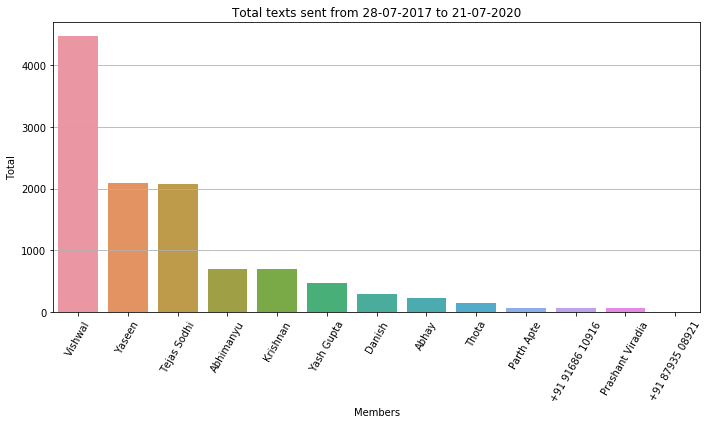

In [6]:
plt.figure(figsize=(10,6))
hist = sns.countplot(df['sender'], order=df['sender'].value_counts().index)
hist.grid(True, axis='y')
hist.set_xlabel('Members')
hist.set_ylabel('Total')
hist.set_xticklabels(hist.get_xticklabels(), rotation=60)
plt.title("Total texts sent from 28-07-2017 to 21-07-2020")
plt.tight_layout()
plt.savefig("Total_texts.png", quality=90)

In [7]:
df.head()

,timestamp,sender,message
0,2017-07-28 00:09:00,Yash Gupta,Uski death ho gayi
1,2017-07-28 00:10:00,Yash Gupta,Kal shaam
2,2017-07-28 00:26:00,Abhimanyu,Uski bike thi ek
3,2017-07-28 00:26:00,Abhimanyu,My life my bike
4,2017-07-28 00:27:00,Abhimanyu,Aise post dalta tha


In [8]:
df['year'], df['month'] = df['timestamp'].dt.year, df['timestamp'].dt.month
df.head(10)

,timestamp,sender,message,year,month
0,2017-07-28 00:09:00,Yash Gupta,Uski death ho gayi,2017,7
1,2017-07-28 00:10:00,Yash Gupta,Kal shaam,2017,7
2,2017-07-28 00:26:00,Abhimanyu,Uski bike thi ek,2017,7
3,2017-07-28 00:26:00,Abhimanyu,My life my bike,2017,7
4,2017-07-28 00:27:00,Abhimanyu,Aise post dalta tha,2017,7
5,2017-08-05 09:31:00,Danish,😂,2017,8
6,2017-08-05 09:49:00,Yash Gupta,Thanks Prashant,2017,8
7,2017-08-05 09:50:00,Parth Apte,Happy birthday Yash🤙🏻,2017,8
8,2017-08-05 09:51:00,Yash Gupta,Thank you Parth!,2017,8
9,2017-08-05 09:53:00,Yaseen,Kal kitne baje hai party?,2017,8


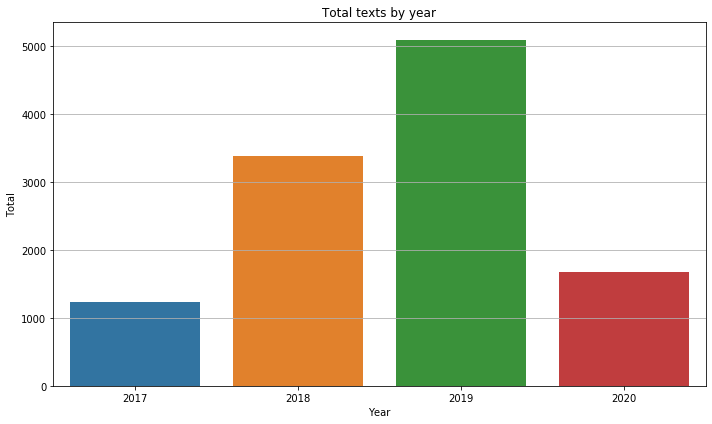

In [9]:
plt.figure(figsize=(10,6))
hist = sns.countplot(df['year'])
hist.grid(True, axis='y')
hist.set_xlabel('Year')
hist.set_ylabel('Total')
hist.set_xticklabels(hist.get_xticklabels())
plt.title('Total texts by year')
plt.tight_layout()
plt.savefig("Total_texts_by_Year.png", quality=90)

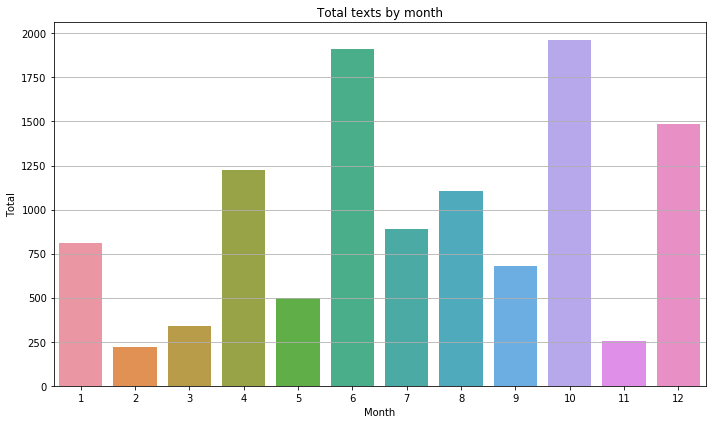

In [10]:
plt.figure(figsize=(10,6))
hist = sns.countplot(df['month'])
hist.grid(True, axis='y')
hist.set_xlabel('Month')
hist.set_xticklabels(hist.get_xticklabels())
hist.set_ylabel('Total')
plt.title('Total texts by month')
plt.tight_layout()
plt.savefig('Total_texts_by_month.png', quality=90)

In [11]:
df['hour'] = df['timestamp'].dt.hour
df.head(10)

,timestamp,sender,message,year,month,hour
0,2017-07-28 00:09:00,Yash Gupta,Uski death ho gayi,2017,7,0
1,2017-07-28 00:10:00,Yash Gupta,Kal shaam,2017,7,0
2,2017-07-28 00:26:00,Abhimanyu,Uski bike thi ek,2017,7,0
3,2017-07-28 00:26:00,Abhimanyu,My life my bike,2017,7,0
4,2017-07-28 00:27:00,Abhimanyu,Aise post dalta tha,2017,7,0
5,2017-08-05 09:31:00,Danish,😂,2017,8,9
6,2017-08-05 09:49:00,Yash Gupta,Thanks Prashant,2017,8,9
7,2017-08-05 09:50:00,Parth Apte,Happy birthday Yash🤙🏻,2017,8,9
8,2017-08-05 09:51:00,Yash Gupta,Thank you Parth!,2017,8,9
9,2017-08-05 09:53:00,Yaseen,Kal kitne baje hai party?,2017,8,9


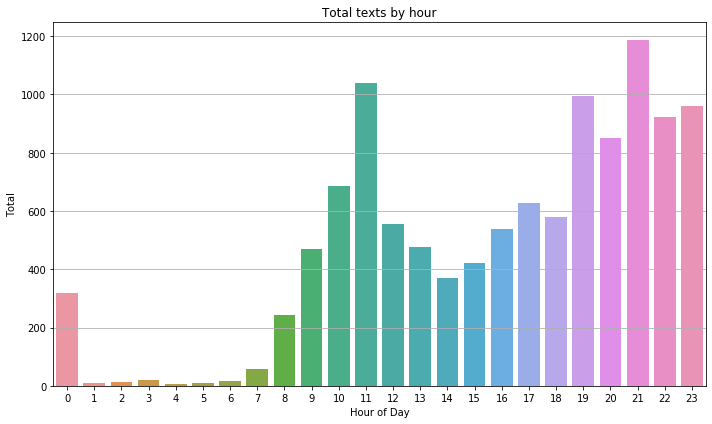

In [12]:
plt.figure(figsize=(10,6))
hist = sns.countplot(df['hour'])
hist.grid(True, axis='y')
hist.set_xlabel('Hour of Day')
hist.set_xticklabels(hist.get_xticklabels())
hist.set_ylabel('Total')
plt.title('Total texts by hour')
plt.tight_layout()
plt.savefig('Total_texts_by_hour.png', quality=90)

In [13]:
by_year = df.groupby(['sender', 'year']).count().unstack()['message']

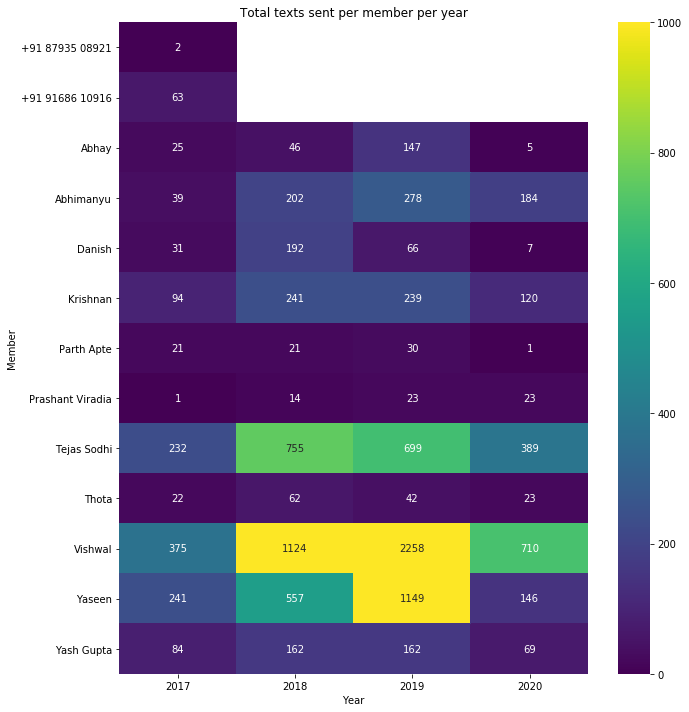

In [14]:
plt.figure(figsize=(10,10))
heat = sns.heatmap(by_year, cmap='viridis', annot=True, fmt='.0f', vmin=0, vmax=1000)
heat.set_xlabel('Year')
heat.set_ylabel('Member')
plt.title('Total texts sent per member per year')
plt.tight_layout()
plt.savefig('per_person_per_year.png', quality=90)

In [15]:
by_month = df.groupby(['sender', 'month']).count().unstack()['message']

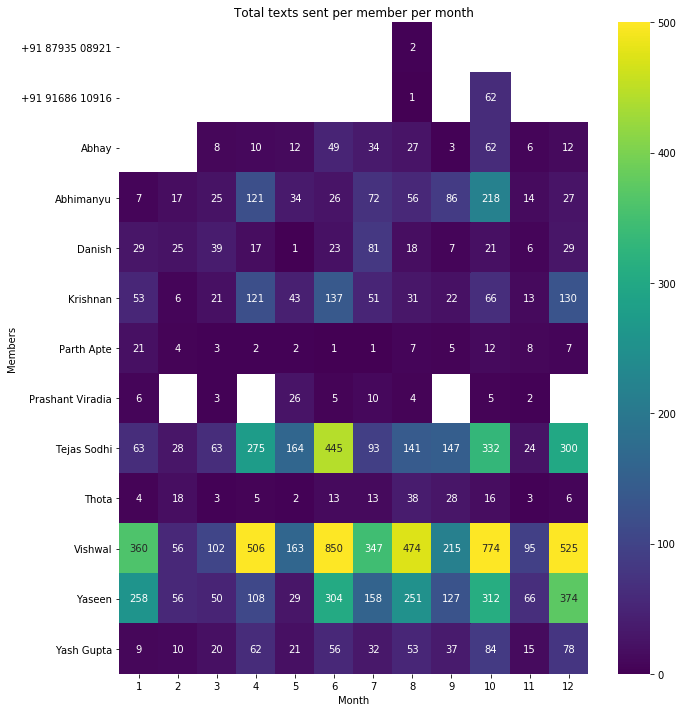

In [16]:
plt.figure(figsize=(10,10))
heat = sns.heatmap(by_month, cmap='viridis', vmin=0, vmax=500, annot=True, fmt='.0f')
heat.set_xlabel('Month')
heat.set_ylabel('Members')
plt.title('Total texts sent per member per month')
plt.tight_layout()
plt.savefig('per_person_per_month.png', quality=90)

In [17]:
import itertools
x = df.sender.values

names = []; message_length = []
# generates a new group every time the value of the list changes
# https://docs.python.org/2/library/itertools.html#itertools.groupby
for k, g in itertools.groupby(x):
    names.append(k)
    message_length.append(len(list(g)))
    
df2 = pd.DataFrame(zip(names, message_length), columns=['sender', 'length'])
df2.head(15)

,sender,length
0,Yash Gupta,2
1,Abhimanyu,3
2,Danish,1
3,Yash Gupta,1
4,Parth Apte,1
5,Yash Gupta,1
6,Yaseen,1
7,Krishnan,1
8,Abhay,1
9,Yash Gupta,3


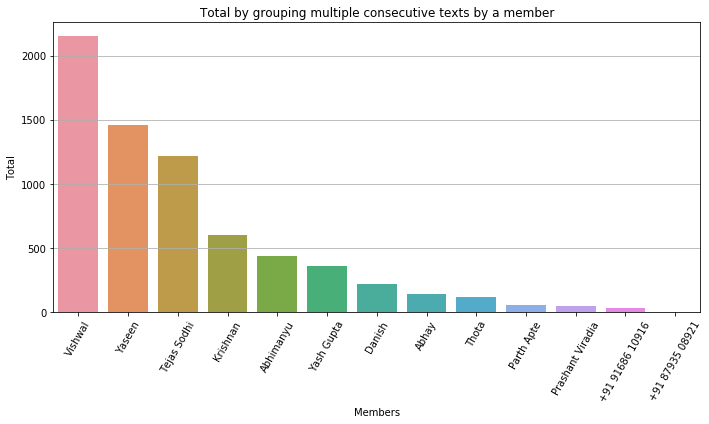

In [18]:
#Multiple Consecutive texts

plt.figure(figsize=(10,6))
hist = sns.countplot(df2['sender'], order=df2['sender'].value_counts().index)
hist.grid(True, axis='y')
hist.set_xlabel('Members')
hist.set_ylabel('Total')
hist.set_xticklabels(hist.get_xticklabels(), rotation=60)
plt.title('Total by grouping multiple consecutive texts by a member')
plt.tight_layout()
plt.savefig('total_consecutive.png', quality=90)

In [19]:
df['month_year'] = df['timestamp'].dt.to_period('M')
df.head()

,timestamp,sender,message,year,month,hour,month_year
0,2017-07-28 00:09:00,Yash Gupta,Uski death ho gayi,2017,7,0,2017-07
1,2017-07-28 00:10:00,Yash Gupta,Kal shaam,2017,7,0,2017-07
2,2017-07-28 00:26:00,Abhimanyu,Uski bike thi ek,2017,7,0,2017-07
3,2017-07-28 00:26:00,Abhimanyu,My life my bike,2017,7,0,2017-07
4,2017-07-28 00:27:00,Abhimanyu,Aise post dalta tha,2017,7,0,2017-07


In [20]:
df['day_month_year'] = df['timestamp'].dt.to_period('D')
df.head()

,timestamp,sender,message,year,month,hour,month_year,day_month_year
0,2017-07-28 00:09:00,Yash Gupta,Uski death ho gayi,2017,7,0,2017-07,2017-07-28
1,2017-07-28 00:10:00,Yash Gupta,Kal shaam,2017,7,0,2017-07,2017-07-28
2,2017-07-28 00:26:00,Abhimanyu,Uski bike thi ek,2017,7,0,2017-07,2017-07-28
3,2017-07-28 00:26:00,Abhimanyu,My life my bike,2017,7,0,2017-07,2017-07-28
4,2017-07-28 00:27:00,Abhimanyu,Aise post dalta tha,2017,7,0,2017-07,2017-07-28


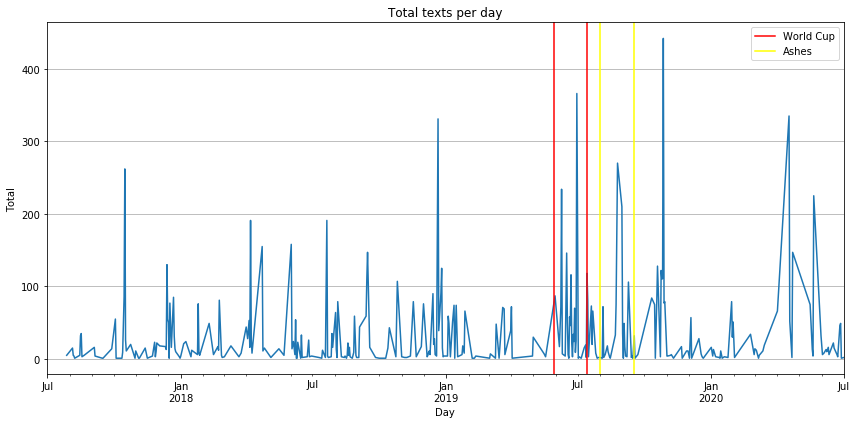

In [21]:
xticks = df['month_year'].unique().strftime('%m-%Y')

plt.figure(figsize=(12,6))
ax = df.groupby('day_month_year').message.count().plot()
plt.xlabel('Day')
plt.ylabel('Total')
ax.set_xlim(xmin='07-2017', xmax='07-2020')
wc = plt.axvline(x='2019-05-30', color='red')
plt.axvline(x='2019-07-14', color='red')
ashes = plt.axvline(x='2019-08-01', color='yellow')
plt.axvline(x='2019-09-16', color='yellow')
ax.legend((wc, ashes), ('World Cup', 'Ashes'))
plt.grid(axis='y')
plt.title('Total texts per day')
plt.tight_layout()
plt.savefig('total_per_day.png', quality=90)

In [22]:
df['characters'] = df.message.apply(len)
df['words'] = df.message.apply(lambda x: len(x.split()))

mean_char = df.groupby('sender').mean().sort_values('characters').round(2)

In [23]:
df['message'].value_counts().head(20)

<Media omitted>    302
😂                  153
😂😂                  77
Ha                  64
Oh                  53
🙆🏻‍♂                51
Haa                 48
😂😂😂                 39
Lol                 37
👍🏻                  35
🤣                   28
Yes                 27
🙆🏿‍♂                25
😏                   23
😆                   22
🧐                   22
?                   21
Chup                20
🖐🏻                  19
☹                   19
Name: message, dtype: int64

In [24]:
from collections import Counter

words = ''
for i in df.message.values:
    words += '{} '.format(i.lower()) # make words lowercase

pd.DataFrame(Counter(words.split()).most_common(20), columns=['word', 'frequency'])

,word,frequency
0,hai,1174
1,bhi,436
2,ke,401
3,kya,391
4,nai,374
5,to,308
6,hi,305
7,<media,302
8,omitted>,302
9,ko,301


In [25]:
import numpy as np

df['reply_time'] = (df.timestamp.shift(-1) - df.timestamp).apply(lambda x: x.total_seconds()/60).fillna(np.inf)

# if reply time is more than 20 mins add 1 to counter
df['conversation'] = (df.reply_time > 20).cumsum().shift(1).fillna(0).astype(int) + 1

df3 = df.groupby('conversation').agg({'timestamp': ['min', 'max', 'count'], 
                                      'sender': ['first', 'unique', 'nunique']})

df3['duration'] = (df3['timestamp']['max'] - df3['timestamp']['min']).apply(lambda x: x.total_seconds()/60)
df3.head(10)

timestamp                                     sender  \
                             min                 max count            first   
conversation                                                                  
1            2017-07-28 00:09:00 2017-07-28 00:27:00     5       Yash Gupta   
2            2017-08-05 09:31:00 2017-08-05 10:37:00    10           Danish   
3            2017-08-05 11:58:00 2017-08-05 11:59:00     2            Abhay   
4            2017-08-05 13:11:00 2017-08-05 13:11:00     1           Danish   
5            2017-08-05 14:30:00 2017-08-05 14:30:00     2       Yash Gupta   
6            2017-08-06 11:06:00 2017-08-06 11:18:00     2  +91 87935 08921   
7            2017-08-06 11:53:00 2017-08-06 11:53:00     1           Yaseen   
8            2017-08-06 13:52:00 2017-08-06 14:02:00     2           Danish   
9            2017-08-07 19:17:00 2017-08-07 19:41:00     4           Yaseen   
10           2017-08-08 18:36:00 2017-08-08 18:36:00     1          Vishwal   

                                                                         \
                                                         unique nunique   
conversation                                                              
1                                       [Yash Gupta, Abhimanyu]       2   
2             [Danish, Yash Gupta, Parth Apte, Yaseen, Krish...       6   
3                                                       [Abhay]       1   
4                                                      [Danish]       1   
5                                                  [Yash Gupta]       1   
6                                      [+91 87935 08921, Thota]       2   
7                                                      [Yaseen]       1   
8                                          [Danish, Yash Gupta]       2   
9                              [Yaseen, Parth Apte, Yash Gupta]       3   
10                                                    [Vishwal]       1   

             duration  
                       
conversation           
1                18.0  
2                66.0  
3                 1.0  
4                 0.0  
5                 0.0  
6                12.0  
7                 0.0  
8                10.0  
9                24.0  
10                0.0

In [26]:
df.head(10)

,timestamp,sender,message,year,month,hour,month_year,day_month_year,characters,words,reply_time,conversation
0,2017-07-28 00:09:00,Yash Gupta,Uski death ho gayi,2017,7,0,2017-07,2017-07-28,18,4,1.0,1
1,2017-07-28 00:10:00,Yash Gupta,Kal shaam,2017,7,0,2017-07,2017-07-28,9,2,16.0,1
2,2017-07-28 00:26:00,Abhimanyu,Uski bike thi ek,2017,7,0,2017-07,2017-07-28,16,4,0.0,1
3,2017-07-28 00:26:00,Abhimanyu,My life my bike,2017,7,0,2017-07,2017-07-28,15,4,1.0,1
4,2017-07-28 00:27:00,Abhimanyu,Aise post dalta tha,2017,7,0,2017-07,2017-07-28,19,4,12064.0,1
5,2017-08-05 09:31:00,Danish,😂,2017,8,9,2017-08,2017-08-05,1,1,18.0,2
6,2017-08-05 09:49:00,Yash Gupta,Thanks Prashant,2017,8,9,2017-08,2017-08-05,15,2,1.0,2
7,2017-08-05 09:50:00,Parth Apte,Happy birthday Yash🤙🏻,2017,8,9,2017-08,2017-08-05,21,3,1.0,2
8,2017-08-05 09:51:00,Yash Gupta,Thank you Parth!,2017,8,9,2017-08,2017-08-05,16,3,2.0,2
9,2017-08-05 09:53:00,Yaseen,Kal kitne baje hai party?,2017,8,9,2017-08,2017-08-05,25,5,8.0,2


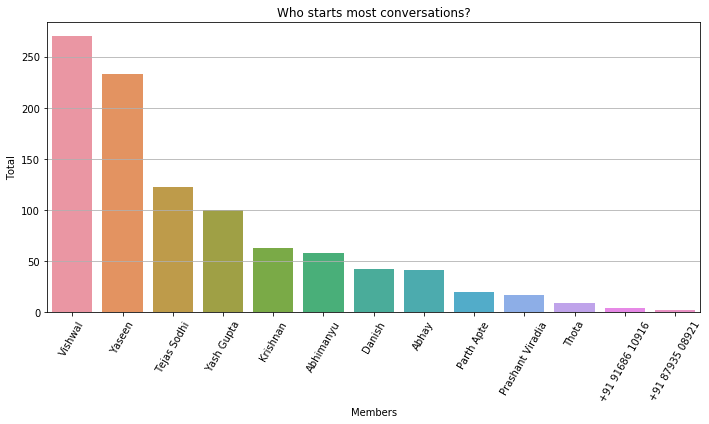

In [27]:
#Who starts most conversations

plt.figure(figsize=(10,6))
hist = sns.countplot(df3['sender']['first'], order=df3['sender']['first'].value_counts().index)
hist.grid(True, axis='y')
hist.set_xlabel('Members')
hist.set_ylabel('Total')
hist.set_xticklabels(hist.get_xticklabels(), rotation=60)
plt.title('Who starts most conversations?')
plt.tight_layout()
plt.savefig('starts_conv.png', quality=90)

In [28]:
df.head(10)

,timestamp,sender,message,year,month,hour,month_year,day_month_year,characters,words,reply_time,conversation
0,2017-07-28 00:09:00,Yash Gupta,Uski death ho gayi,2017,7,0,2017-07,2017-07-28,18,4,1.0,1
1,2017-07-28 00:10:00,Yash Gupta,Kal shaam,2017,7,0,2017-07,2017-07-28,9,2,16.0,1
2,2017-07-28 00:26:00,Abhimanyu,Uski bike thi ek,2017,7,0,2017-07,2017-07-28,16,4,0.0,1
3,2017-07-28 00:26:00,Abhimanyu,My life my bike,2017,7,0,2017-07,2017-07-28,15,4,1.0,1
4,2017-07-28 00:27:00,Abhimanyu,Aise post dalta tha,2017,7,0,2017-07,2017-07-28,19,4,12064.0,1
5,2017-08-05 09:31:00,Danish,😂,2017,8,9,2017-08,2017-08-05,1,1,18.0,2
6,2017-08-05 09:49:00,Yash Gupta,Thanks Prashant,2017,8,9,2017-08,2017-08-05,15,2,1.0,2
7,2017-08-05 09:50:00,Parth Apte,Happy birthday Yash🤙🏻,2017,8,9,2017-08,2017-08-05,21,3,1.0,2
8,2017-08-05 09:51:00,Yash Gupta,Thank you Parth!,2017,8,9,2017-08,2017-08-05,16,3,2.0,2
9,2017-08-05 09:53:00,Yaseen,Kal kitne baje hai party?,2017,8,9,2017-08,2017-08-05,25,5,8.0,2


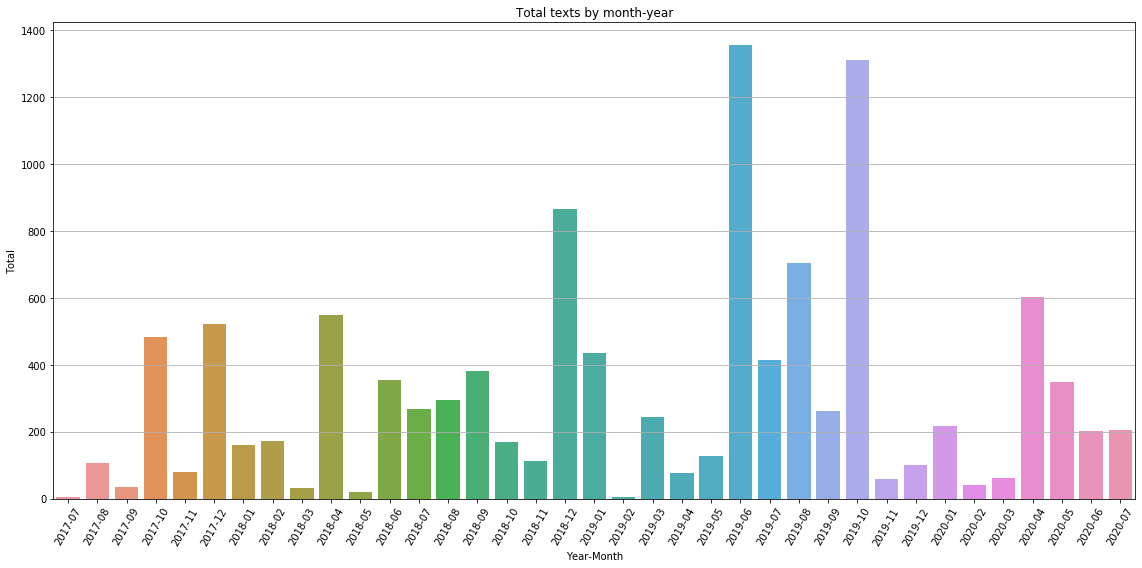

In [29]:
plt.figure(figsize=(16,8))
ax = sns.countplot(df['month_year'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.set_xlabel('Year-Month')
ax.set_ylabel('Total')
plt.grid(axis='y')
plt.title('Total texts by month-year')
plt.tight_layout()
plt.savefig('total_per_month-year.png', quality=90)

In [30]:
df.groupby('month_year').conversation.count()

month_year
2017-07       5
2017-08     105
2017-09      36
2017-10     483
2017-11      80
2017-12     521
2018-01     159
2018-02     172
2018-03      32
2018-04     548
2018-05      21
2018-06     353
2018-07     268
2018-08     295
2018-09     380
2018-10     170
2018-11     112
2018-12     866
2019-01     435
2019-02       6
2019-03     243
2019-04      77
2019-05     127
2019-06    1355
2019-07     414
2019-08     703
2019-09     261
2019-10    1311
2019-11      60
2019-12     101
2020-01     216
2020-02      42
2020-03      62
2020-04     602
2020-05     349
2020-06     201
2020-07     205
Freq: M, Name: conversation, dtype: int64